# MAT281 - Laboratorio N°08


<a id='p1'></a>
## I.- Problema 01


<img src="https://www.cardrates.com/wp-content/uploads/2020/08/shutterstock_576998230.jpg?1" width="480" height="360" align="center"/>


El conjunto de datos se denomina `creditcard.csv` y consta de varias columnas con información acerca del fraude de tarjetas de crédito, en donde la columna **Class** corresponde a: 0 si no es un fraude y 1 si es un fraude.

En este ejercicio se trabajará el problemas de  clases desbalancedas. Veamos las primeras cinco filas dle conjunto de datos:

In [2]:
# Se importan las librerias necesarias
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
# cargar datos
df = pd.read_csv(os.path.join("data","creditcard.csv"), sep=";")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
2,10.0,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,...,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.50,0
3,10.0,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99,0
4,12.0,1.103215,-0.040296,1.267332,1.289091,-0.735997,0.288069,-0.586057,0.189380,0.782333,...,-0.024612,0.196002,0.013802,0.103758,0.364298,-0.382261,0.092809,0.037051,12.99,0


Analicemos el total de fraudes respecto a los casos que nos son fraudes:


In [4]:
# calcular proporciones
df_count = pd.DataFrame()
df_count["fraude"] =["no","si"]
df_count["total"] = df["Class"].value_counts() 
df_count["porcentaje"] = 100*df_count["total"] /df_count["total"] .sum()

df_count

,fraude,total,porcentaje
0,no,50000,99.025588
1,si,492,0.974412


Visto esto de forma gráfica.

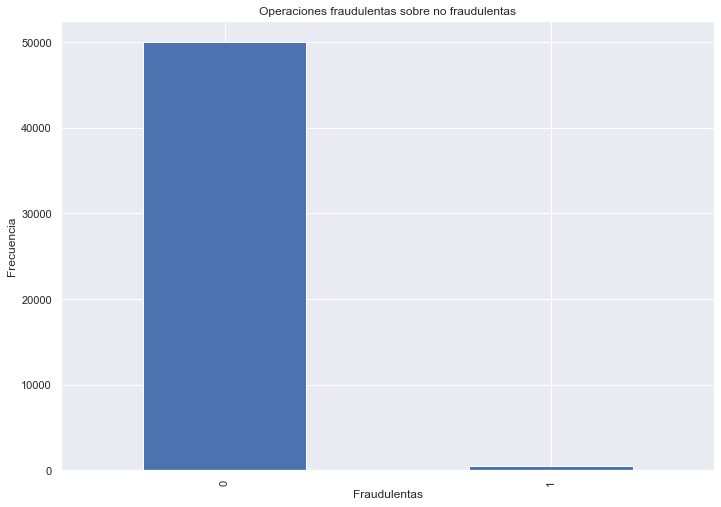

In [5]:
 count_classes = pd.value_counts(df['Class'], sort = False)
count_classes.plot (kind='bar')
plt.title ("Operaciones fraudulentas sobre no fraudulentas")
plt.xlabel ("Fraudulentas")
plt.ylabel ("Frecuencia")
plt.show()

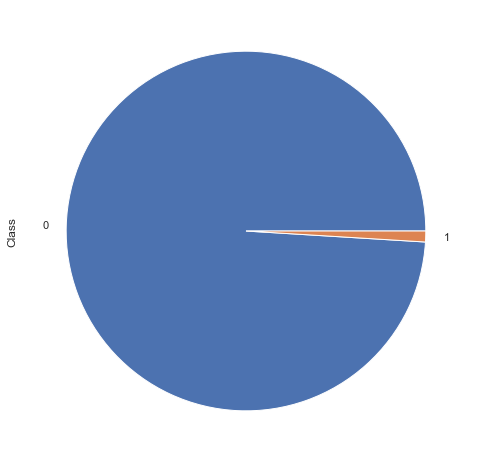

In [16]:
df['Class'].value_counts().plot(kind='pie')
plt.show()

Se observa que menos del 1% corresponde a registros frudulentos. La pregunta que surgen son:

* ¿ Cómo deben ser el conjunto de entrenamiento y de testeo?
* ¿ Qué modelos ocupar?
* ¿ Qué métricas ocupar?

Por ejemplo, analicemos el modelos de regresión logística y apliquemos el procedimiento estándar:

In [6]:
# datos 
y = df.Class
X = df.drop('Class', axis=1)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)


# Creando el modelo
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
 
# predecir
lr_pred = lr.predict(X_test)

# calcular accuracy
accuracy_score(y_test, lr_pred)

0.9961181969420898

En general el modelo tiene un **accuracy** del 99,9%, es decir, un podría suponer que el modelo predice casi perfectamente, pero eso esta lejos de ser así.  Para ver por qué es necesario seguir los siguientes pasos:

### 1. Cambiar la métrica de rendimiento

El primer paso es comparar con distintas métricas, para eso ocupemos las 4 métricas clásicas abordadas en el curso:
* accuracy
* precision
* recall
* f-score

En este punto deberá poner las métricas correspondientes y comentar sus resultados.

In [6]:
# metrics
y_true =  list(y_test)
y_pred = list(lr.predict(X_test))

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy_score(y_test, lr_pred))
print('recall:     ',recall_score(y_test, lr_pred))
print('precision:  ',precision_score(y_test, lr_pred))
print('f-score:    ',f1_score(y_test, lr_pred))
print("")


Matriz de confusion:
 
[[12471    16]
 [   33   103]]

Metricas:
 
accuracy:    0.9961181969420898
recall:      0.7573529411764706
precision:   0.865546218487395
f-score:     0.807843137254902



- Si bien las metricas nos entregan buenos valores, aún son mejorables. Analizaremos estas a partir de una mapa de calor.

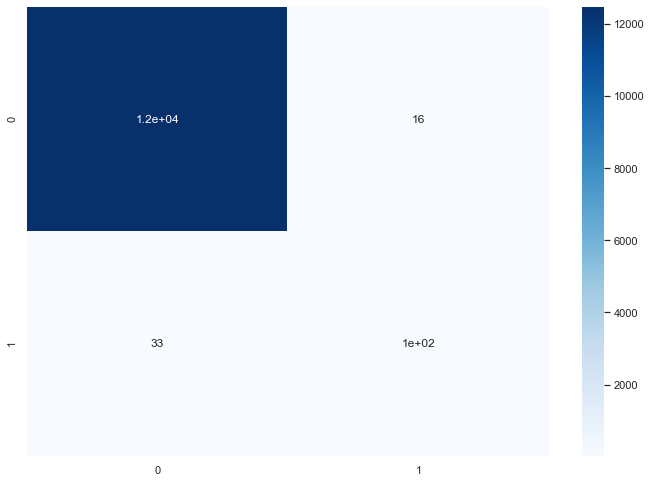

In [7]:
sns.heatmap(confusion_matrix(y_true,y_pred),annot=True, cmap="Blues")
plt.show()

- Se hace apreciable que los valores Verdadero negativo no son predecidos de forma consistente, o comparable con los Verdadero positivo. Es decir, al ser tantos Verdadero positivo, no ajustar correctamente los Verdaderos negativos no tiene un impacto apreciable en la matriz de confusión

### 2. Cambiar algoritmo

El segundo paso es comparar con distintos modelos. Debe tener en cuenta que el modelo ocupaod resuelva el problema supervisado de clasificación.

En este punto deberá ajustar un modelo de **random forest**, aplicar las métricas y comparar con el modelo de regresión logística.

In [13]:
# train model
rfc = RandomForestClassifier(max_depth=5, n_estimators=20, max_features=1).fit(X_train, y_train)

# SVC Se demora bastante en ejecutarse.
#rfc = SVC(C=1, gamma=2).fit(X_train, y_train)

# El árbol de decisión entrega mejores resultados que random forest.
#rfc = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)

In [14]:
# metrics

y_true =  list(y_test)
y_pred = list(rfc.predict(X_test)) # predicciones con random forest


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy_score(y_true,y_pred))
print('recall:     ',recall_score(y_true,y_pred))
print('precision:  ',precision_score(y_true,y_pred))
print('f-score:    ',f1_score(y_true,y_pred))
print("")


Matriz de confusion:
 
[[12485     2]
 [   52    84]]

Metricas:
 
accuracy:    0.9957220945892419
recall:      0.6176470588235294
precision:   0.9767441860465116
f-score:     0.7567567567567568



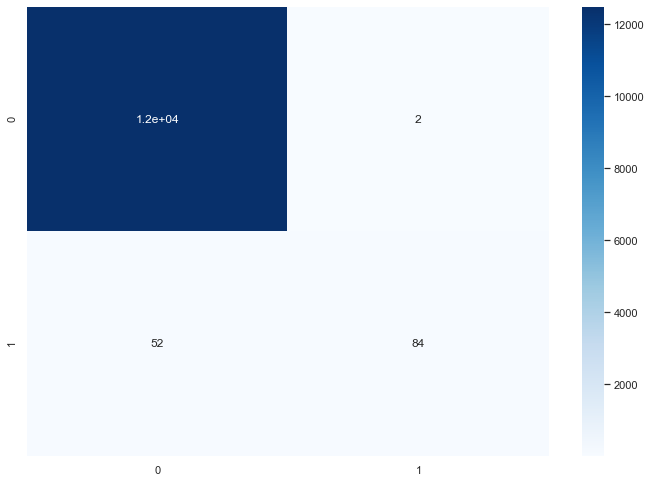

In [15]:
sns.heatmap(confusion_matrix(y_true,y_pred),annot=True, cmap="Blues")
plt.show()

* Probar con otro modelo modifica las métricas pero se sigue observando el mismo problema antes mencionado. Frente a esto tenemos varias soluciones o técnicas que podemos aplicar.
    * Resampling    -->  Para casos en los que el sistema está desbalanceado como éste
    * Undersampling -->  Eliminar casos del tipo mayoritario
    * Oversampling  -->  Replicar de forma sintética los casos minoritarios
    * SMOTE         -->  Una técnica combinación de las dos anteriores 
    
**Por tanto, se aplicarán técnicas de remuestreo o resampleo**

### 3. Técnicas de remuestreo: sobremuestreo de clase minoritaria

El tercer paso es ocupar ténicas de remuestreo, pero sobre la clase minoritaria. Esto significa que mediantes ténicas de remuestreo trataremos de equiparar el número de elementos de la clase minoritaria a la clase mayoritaria.

In [7]:
from sklearn.utils import resample

# concatenar el conjunto de entrenamiento
X = pd.concat([X_train, y_train], axis=1)

# separar las clases
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# remuestrear  clase minoritaria
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# recombinar resultados
upsampled = pd.concat([not_fraud, fraud_upsampled])

# chequear el número de elementos por clases
upsampled.Class.value_counts()

1    37513
0    37513
Name: Class, dtype: int64

In [8]:
# datos de entrenamiento sobre-balanceados
y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

En formá gráfica tenemos lo siguiente

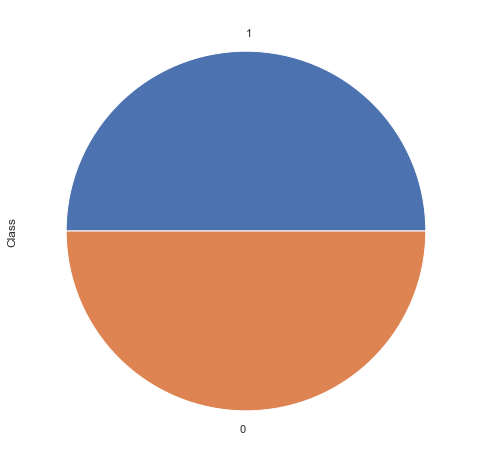

In [9]:
y_train.value_counts().plot(kind='pie')
plt.show()

Ocupando estos nuevos conjunto de entrenamientos, vuelva a aplicar el modelos de regresión logística y calcule las correspondientes métricas. Además, justifique las ventajas y desventjas de este procedimiento.

In [10]:
upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train) # algoritmo de regresion logistica

# metrics

y_true =  list(y_test)
y_pred = list(upsampled.predict(X_test))


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy_score(y_true,y_pred))
print('recall:     ',recall_score(y_true,y_pred))
print('precision:  ',precision_score(y_true,y_pred))
print('f-score:    ',f1_score(y_true,y_pred))
print("")


Matriz de confusion:
 
[[12200   287]
 [   12   124]]

Metricas:
 
accuracy:    0.976313079299691
recall:      0.9117647058823529
precision:   0.30170316301703165
f-score:     0.45338208409506403



### 4. Técnicas de remuestreo - Ejemplo de clase mayoritaria

El cuarto paso es ocupar ténicas de remuestreo, pero sobre la clase mayoritaria. Esto significa que mediantes ténicas de remuestreo trataremos de equiparar el número de elementos de la clase mayoritaria  a la clase minoritaria.

In [11]:
# remuestreo clase mayoritaria
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# recombinar resultados
downsampled = pd.concat([not_fraud_downsampled, fraud])

# chequear el número de elementos por clases
downsampled.Class.value_counts()

1    356
0    356
Name: Class, dtype: int64

In [12]:
# datos de entrenamiento sub-balanceados

y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

En formá gráfica tenemos lo siguiente

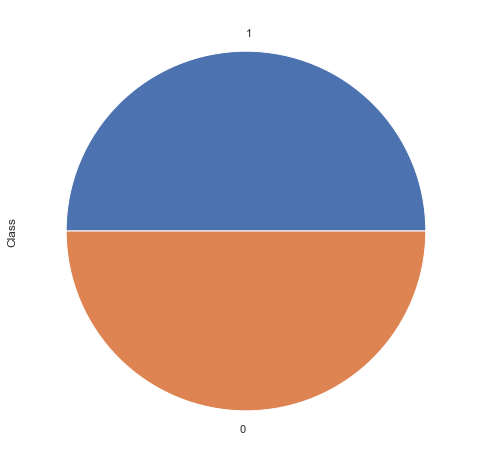

In [13]:
y_train.value_counts().plot(kind='pie')
plt.show()

Ocupando estos nuevos conjunto de entrenamientos, vuelva a aplicar el modelos de regresión logística y calcule las correspondientes métricas. Además, justifique las ventajas y desventjas de este procedimiento.

In [15]:
undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train) # modelo de regresi+on logística
# metrics

y_true =  list(y_test)
y_pred = list(undersampled.predict(X_test))


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy_score(y_true,y_pred))
print('recall:     ',recall_score(y_true,y_pred))
print('precision:  ',precision_score(y_true,y_pred))
print('f-score:    ',f1_score(y_true,y_pred))
print("")


Matriz de confusion:
 
[[11695   792]
 [   14   122]]

Metricas:
 
accuracy:    0.9361483007209063
recall:      0.8970588235294118
precision:   0.13347921225382933
f-score:     0.23238095238095238



### 5. Conclusiones

Para finalizar el laboratorio, debe realizar un análisis comparativo con los disintos resultados obtenidos  en los pasos 1-4. Saque sus propias conclusiones del caso.

* Las partes 1 y 2 nos muestran que sin importar el modelo utilizado, a causa del desbalance de datos las métricas no nos proporcionarán resultados correctos.
* Las partes 3 y 4, si bien logran balancear los datos, no entregan buenos valores en cuanto a las métricas. En accuracy y recall se obtienen valores cercanos a 1, pero para precision y f-score los valores son muy bajos, incluso cercanos a 0.

### 6. Solución propuesta

In [1]:
# Se importan las librerias necesarias
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","creditcard.csv"), sep=";")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
2,10.0,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,...,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.50,0
3,10.0,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99,0
4,12.0,1.103215,-0.040296,1.267332,1.289091,-0.735997,0.288069,-0.586057,0.189380,0.782333,...,-0.024612,0.196002,0.013802,0.103758,0.364298,-0.382261,0.092809,0.037051,12.99,0


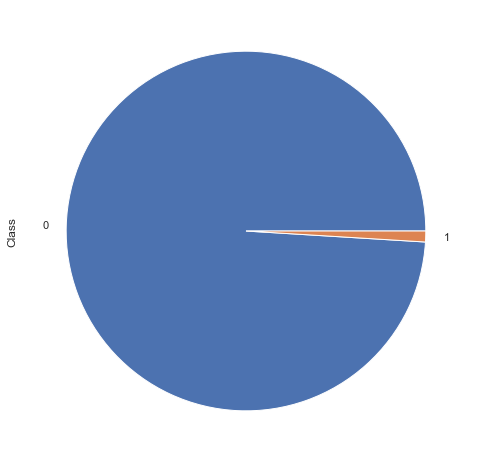

In [3]:
df['Class'].value_counts().plot(kind='pie')
plt.show()

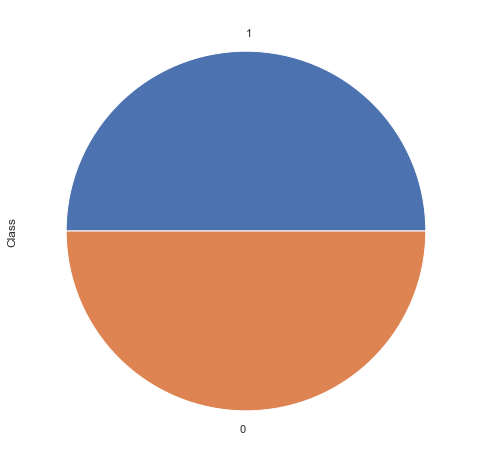

In [5]:
df.drop_duplicates(keep=False,inplace=True)
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
smote=SMOTE()
x,y=smote.fit_resample(x,y)
y.value_counts().plot(kind='pie')
plt.show()

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)
def model_evaluate(model):
    model.fit(xtrain,ytrain)
    acc=model.score(xtest,ytest)
    
    print("Model Name",model)
    print("Acuuracy",acc)

lr=LogisticRegression(solver='liblinear')
svm=SVC()
dt=DecisionTreeClassifier(max_depth=6)
rf=RandomForestClassifier(max_samples=0.9)
knn=KNeighborsClassifier(n_neighbors=5)

models=[lr,dt,rf,knn]

for model in models:
    model_evaluate(model)


Model Name LogisticRegression(solver='liblinear')
Acuuracy 0.9764193451486933
Model Name DecisionTreeClassifier(max_depth=6)
Acuuracy 0.9695103634725143
Model Name RandomForestClassifier(max_samples=0.9)
Acuuracy 0.9987483728847502
Model Name KNeighborsClassifier()
Acuuracy 0.9954440773004907


- Se utilizará **RandomForestClassifier()** dado que es el que mejor score nos entregó.

In [9]:
aux = RandomForestClassifier(max_samples=0.9).fit(xtrain, ytrain)
#aux = LogisticRegression(solver='liblinear').fit(xtrain, ytrain)

y_true =  list(ytest)
y_pred = list(aux.predict(xtest))


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy_score(y_true,y_pred))
print('recall:     ',recall_score(y_true,y_pred))
print('precision:  ',precision_score(y_true,y_pred))
print('f-score:    ',f1_score(y_true,y_pred))
print("")


Matriz de confusion:
 
[[10067    12]
 [   11  9884]]

Metricas:
 
accuracy:    0.9988485030539702
recall:      0.9988883274381001
precision:   0.9987873888439773
f-score:     0.9988378555909252



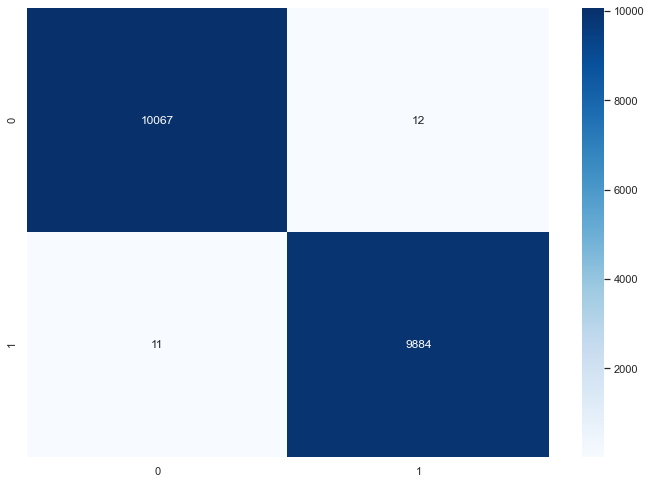

In [11]:
conf_matrix = confusion_matrix(ytest, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt='g', cmap="Blues")
plt.show()

* **En esta ocasión observamos que fue posible máximizar todos los indicadores a valores muy cercanos a 1.**
* Adicionalmente, el mapa de calor obtenido y generado desde la matriz de confusión nos da valores muy buenos en la diagonal.